# Lab 8: MNIST data analysis


## Brief Overview

The task of this notebook is to classify handwriten digits data given from MNIST.

This dataset has 70000 data and each data is originally 28x28 pixel of handwriten image. Each pixel ranges 0 to 255.
The labels values are 0 to 9.


In this task, I use logistic regression model and neural network.

Other information is in <http://yann.lecun.com/exdb/mnist/>

## Exploratory Data Analysis

In exploratory data analysis, I will show 


- data type
- data shape
- first 5 images

In [1]:
# load digit data
%matplotlib inline
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
print(mnist["DESCR"])

mldata.org dataset: mnist-original


In [2]:
# data type and shape information
print("Data type:", type(mnist))
print("items of digits", dir(mnist))
print(mnist["COL_NAMES"])
print("Shape of data:", mnist.data.shape)
print("Shape of label:", mnist.target.shape)

Data type: <class 'sklearn.utils.Bunch'>
items of digits ['COL_NAMES', 'DESCR', 'data', 'target']
['label', 'data']
Shape of data: (70000, 784)
Shape of label: (70000,)


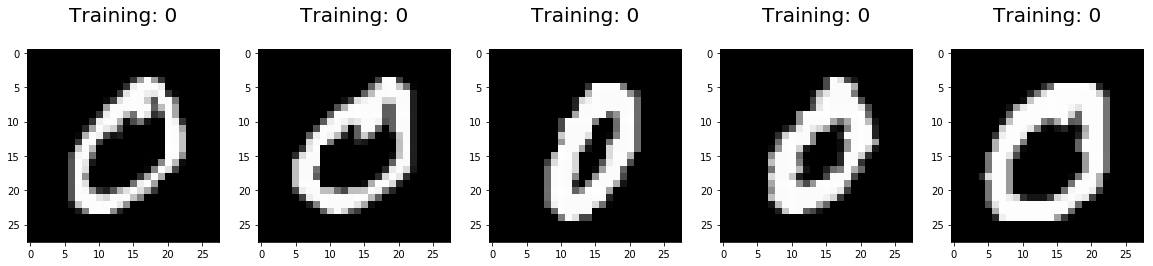

In [6]:
# first 5 images
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)
    



## MNIST Logistic Regression

In logistic regression, I use 52500 data(75% of all data) as train data, and 17500 data as test data to evaluate model.
Also, I calculate execution time, and save it as a pickle binary.

The reason to save fitted model is it need lots of time to fit.

First, I split dataset, fit the model and save it.

In [27]:
import pickle
from time import time
from os.path import exists
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# train test split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=0)

# fit logistic model and save fitted model, or load model from file
logistic_model_path = "/Users/reiven/Documents/Python/CSCI4710/Lab8/logistic_model.pkl"
logistic_model_time_path = "/Users/reiven/Documents/Python/CSCI4710/Lab8/logistic_model_time.pkl"
if exists(logistic_model_path):
    with open(logistic_model_path, "rb") as f:
        model = pickle.load(f)
        f.close()
    with open(logistic_model_time_path, "rb") as f:
        calculation_time = pickle.load(f)
        f.close()
else:
    model = LogisticRegression()
    start = time()
    model.fit(X_train, y_train)
    calculation_time = time() - start
    with open(logistic_model_time_path, "wb") as f:
        pickle.dump(calculation_time, f)
        f.close()
    with open(logistic_model_path, "wb") as f:
        pickle.dump(model, f)
        f.close()
print("calculation time: ", calculation_time)

y_pred = model.predict(X_test)

calculation time:  2187.747659921646


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

misclassification_rate = 1 - np.sum(np.diag(cm)) / np.sum(cm)
print("misclassification rate:", misclassification_rate)

misclassification rate: 0.0869714285714


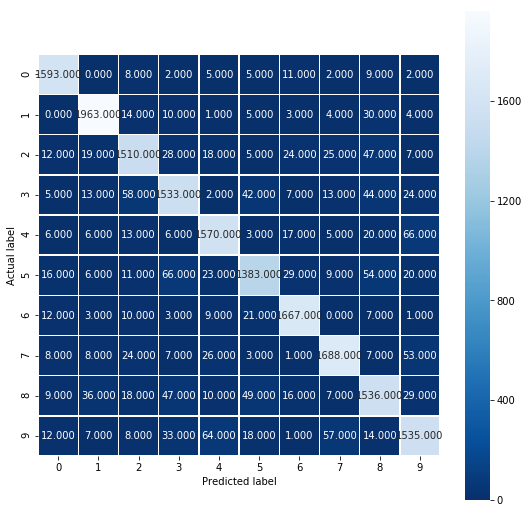

In [9]:
import seaborn as sns

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(1 - misclassification_rate)
plt.show()


### Explanation of the result above

First, it takes more than 30 minutes(2187seconds = 36.45 minutes).
Misclassification rate is 0.087. It is not so bad value to use, I think.

And, as confusion matrix visualization shows that there are some points which tend to misclassify.
Like (actual, prediction) = {(2,8), (3,2), (3,5), (3,8), (4,9), (5,3), (5,8), (7,9), (8,3), (8,5), (9,4), (9,7))}

I think this result seems human's handwriten digits charactristics.

## Mnist Neural Network

In this section, I use scikit learn's MLPClassifier(Multi Layer Perceptron).
I use 3 hidden layer model.
First layer have 100 neurons, second layer have 50 neurons, and final hidden layer have 10 neurons.

I use same train and split data as logistic regression.

In [28]:
import pickle
from os.path import exists
from sklearn.neural_network import MLPClassifier


# fit logistic model and save fitted model, or load model from file
neural_network_path = "/Users/reiven/Documents/Python/CSCI4710/Lab8/nn_model.pkl"
neural_network_time_path = "/Users/reiven/Documents/Python/CSCI4710/Lab8/nn_time.pkl"

# if fitted model's binary file already exist, load it and use it to predict
if exists(neural_network_path):
    with open(neural_network_path, "rb") as f:
        model = pickle.load(f)
        f.close()
    with open(neural_network_time_path, "rb") as f:
        calculation_time = pickle.load(f)
        f.close()
else:  # else fitted model's binary file is not exist, calculate model parameters
    model = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(100, 50, 10), random_state=1)
    start = time()
    model.fit(X_train, y_train)
    calculation_time = time() - start
    with open(neural_network_path, "wb") as f:
        pickle.dump(model, f)
        f.close()
    with open(neural_network_time_path, "wb") as f:
        pickle.dump(calculation_time, f)
        f.close()

print("calculation time: ", calculation_time)

y_pred = model.predict(X_test)


calculation time:  45.744632720947266


In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

misclassification_rate = 1 - np.sum(np.diag(cm)) / np.sum(cm)
print("misclassification rate:", misclassification_rate)

misclassification rate: 0.0368571428571


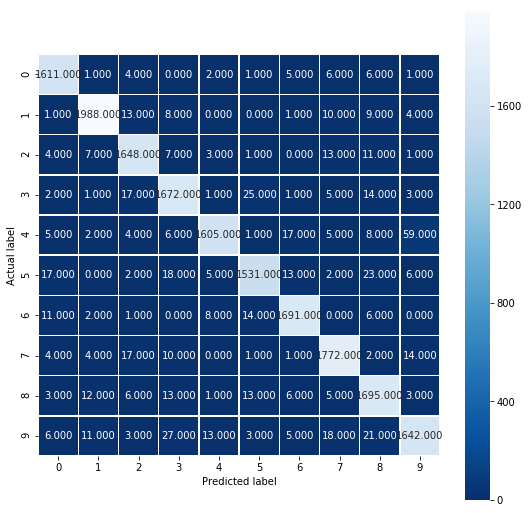

In [25]:
import seaborn as sns

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(1 - misclassification_rate)
plt.show()


### Explanation of the result above

First, it takes more than 45 seconds.
Misclassification rate is 0.037. It is good value to use, I think.

And, as confusion matrix visualization shows that there are some points which tend to misclassify.
Like (actual, prediction) = {(4,9), (9,4)}

------
#### Small bad trial that I did

At the first time, I tried the code in <http://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification>
with small fix.

The result(misclassification rate) is really bad.
I think it is good example that shows the importance of parameter setting of neural network.

So, I put the code below.

In [30]:
# small weird experience.

model = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
misclassification_rate = 1 - np.sum(np.diag(cm)) / np.sum(cm)
print("misclassification rate:", misclassification_rate)

misclassification rate: 0.652685714286


## Conclusion

From the results of both model, neural network is almost 50 times(48.6 times) faster than logistic regression.
Prediction is also better.

Of course, I use reguralization parameter in logistic regression, we should care parameter tuning for neural network much more.